In [2]:
import cv2
import numpy as np
import os
import datetime
import os
import random
import matplotlib.pyplot as plt
import glob
import urllib

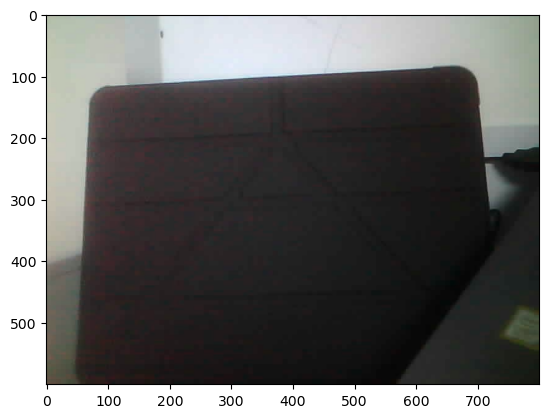

In [5]:
bg = cv2.imread('10113-bg4.jpg')
plt.imshow(bg)
plt.show()

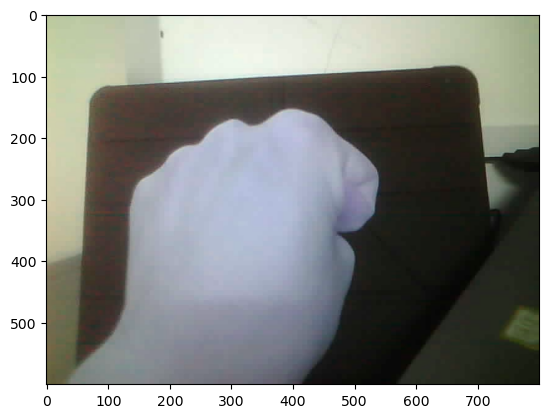

In [3]:
image = cv2.imread('10113-hand5.jpg')
plt.imshow(image)
plt.show()

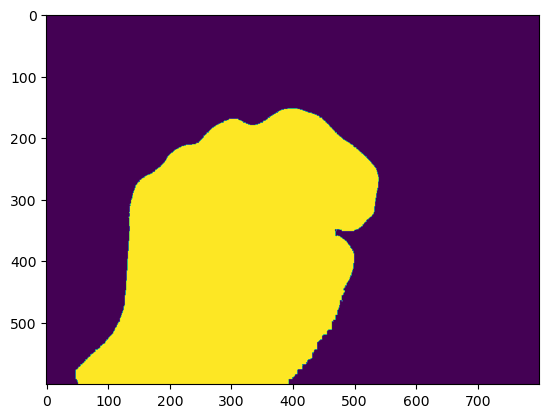

In [37]:
#---------------------------------------------
# To segment the region of hand in the image
#---------------------------------------------
def imageProcess(bg, image, threshold=30):
    
    
    # find the absolute difference between background and current frame
    diff = cv2.absdiff(bg, image)
    diff = cv2.cvtColor(diff, cv2.COLOR_RGB2GRAY)
    
    # thresholding
    ret2,th = cv2.threshold(diff,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return th

thresholded = imageProcess(bg, image)
plt.imshow(thresholded)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])


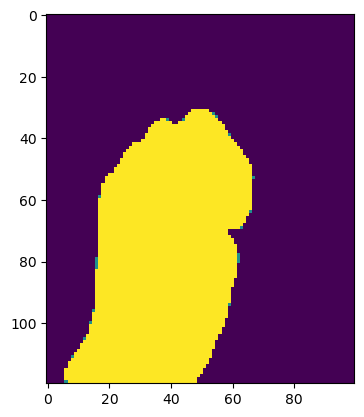

In [38]:
gray_img = cv2.resize(thresholded,(100, 120))
plt.imshow(gray_img)
gray_img = gray_img.reshape((1,1,120,100))
img_tensor_x = torch.Tensor(gray_img)
print(img_tensor_x)

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [11]:
class CNNModel(nn.Module):
    def __init__(self): # class constructor function

        super(CNNModel, self).__init__() # initialize an instance of the parent class

        # first convolutional and maxpool layer
        # input 1x120x100, output 16x116x96
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size=(5, 5))
        # input 16x116x96, output 16x58x48
        self.maxpool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

        # second convolutional and maxpool layer
        # input 16x58x48, output 32x54x44
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(5, 5))
        # input 32x54x44, output 32x27x22
        self.maxpool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

        # linear layer
        self.fc1 = nn.Linear(in_features=19008, out_features=120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,3)


    def forward(self, x):
        # Layer 1
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool1(x)

        # Layer 2
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool2(x)

        # Output Fully Connected Layers
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        output = x

        # return the output predictions
        return output

model = CNNModel()

In [12]:
# to load the trained model 
model.load_state_dict(torch.load("D:\Y4S1\CS3237\Project\handclassifier6.pt",map_location=torch.device('cpu')))

<All keys matched successfully>

In [39]:
# for one image classification ('blank'-0, 'fist'-1, 'five'-2)

with torch.no_grad():
  # for i, (data, target) in enumerate(test_loader):
  data = img_tensor_x

  # send the input to the device
  output = model(data)
  print(output)

  # convert output probabilities to predicted class
  _, pred = torch.max(output, 1)
  print(pred)

tensor([[-10.9505,  25.3030, -84.0771]])
tensor([1])
